In [155]:
import numpy as np
import math
import matplotlib.pyplot as plt

# 最小二乘法根据圆的边缘坐标求圆心和半径

# difine edge points

In [156]:
np.random.seed(0)
# 设置参数
radius = 5  # 圆的半径
angle = np.linspace(0, 2 * np.pi, 100)  # 生成100个角度值，从0到2π

# 根据圆的参数方程计算圆上的点
x = radius * np.cos(angle) + np.random.normal(0, 0.02, 100)
y = radius * np.sin(angle) + np.random.normal(0, 0.02, 100)

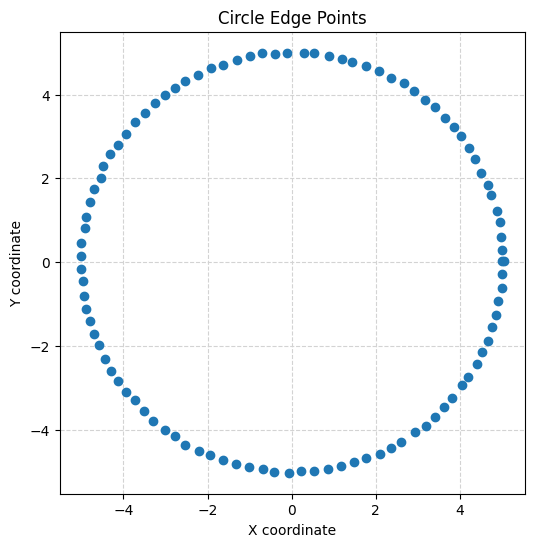

In [157]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# implement1

https://www.cnblogs.com/xiaxuexiaoab/p/16276402.html

https://kimi.moonshot.cn/chat/cp290dsubms6ha9m74j0

In [158]:
def fit_circle_by_least_square1(points: list | np.ndarray) -> tuple:
    """根据最小二乘法求圆心和半径

    Args:
        points (list | np.ndarray): 圆的边缘的xy值, 二维数据
            example:
                [[x1, y1], [x2, y2], [x3, y3]...]

    Returns:
        tuple: 中心坐标x, 中心坐标y, 半径, 计算标准差
    """
    points = np.array(points)
    N = len(points)
    assert N >= 3, "圆的边缘点数量至少为3"

    sum_x = 0.0
    sum_y = 0.0
    sum_x2 = 0.0
    sum_y2 = 0.0
    sum_x3 = 0.0
    sum_y3 = 0.0
    sum_xy = 0.0
    sum_xy2 = 0.0
    sum_x2y = 0.0

    for x, y in points:
        sum_x += x
        sum_y += y

        x2 = x * x
        y2 = y * y
        sum_x2 += x2
        sum_y2 += y2

        sum_x3 += x2 * x
        sum_y3 += y2 * y

        sum_xy += x * y

        sum_xy2 += x * y2
        sum_x2y += x2 * y

    C = N * sum_x2 - sum_x * sum_x
    D = N * sum_xy - sum_x * sum_y
    E = N * sum_x3 + N * sum_xy2 - (sum_x2 + sum_y2) * sum_x
    G = N * sum_y2 - sum_y * sum_y
    H = N * sum_x2y + N * sum_y3 - (sum_x2 + sum_y2) * sum_y

    a = (H * D - E * G) / (C * G - D * D)
    b = (H * C - E * D) / (D * D - G * C)
    c = -(a * sum_x + b * sum_y + sum_x2 + sum_y2) / N

    center_x = -a / 2.0
    center_y = -b / 2.0
    radius = math.sqrt(a ** 2 + b ** 2 - 4 * c) / 2.0

    # err = 0.0
    # for point in points:
    #     e = np.sum((point - np.array([center_x, center_y])) ** 2) - radius ** 2
    #     if e > err:
    #         err = e
    # 求每个点到求出来的中心的距离
    radii = np.sqrt(np.sum((points - np.array([center_x, center_y])) ** 2, axis=1))
    # 计算中心距离和求出来的半径的标准差
    std_err = np.std(radii - radius)

    return center_x, center_y, radius, std_err

# implement2

In [159]:
def fit_circle_by_least_square2(points: list | np.ndarray) -> tuple:
    """根据最小二乘法求圆心和半径

    Args:
        points (list | np.ndarray): 圆的边缘的xy值, 二维数据
            example:
                [[x1, y1], [x2, y2], [x3, y3]...]

    Returns:
        tuple: 中心坐标x, 中心坐标y, 半径, 计算标准差
    """
    points = np.array(points)
    N = len(points)
    assert N >= 3, "圆的边缘点数量至少为3"

    x = points[:, 0]
    y = points[:, 1]
    x2 = x ** 2
    y2 = y ** 2

    sum_x = x.sum()
    sum_y = y.sum()
    sum_x2 = x2.sum()
    sum_y2 = y2.sum()
    sum_x3 = (x2 * x).sum()
    sum_y3 = (y2 * y).sum()
    sum_xy = (x * y).sum()
    sum_xy2 = (x * y2).sum()
    sum_x2y = (x2 * y).sum()

    C = N * sum_x2 - sum_x * sum_x
    D = N * sum_xy - sum_x * sum_y
    E = N * sum_x3 + N * sum_xy2 - (sum_x2 + sum_y2) * sum_x
    G = N * sum_y2 - sum_y * sum_y
    H = N * sum_x2y + N * sum_y3 - (sum_x2 + sum_y2) * sum_y

    a = (H * D - E * G) / (C * G - D * D)
    b = (H * C - E * D) / (D * D - G * C)
    c = -(a * sum_x + b * sum_y + sum_x2 + sum_y2) / N

    center_x = -a / 2.0
    center_y = -b / 2.0
    radius = math.sqrt(a ** 2 + b ** 2 - 4 * c) / 2.0

    # 求每个点到求出来的中心的距离
    radii = np.sqrt(np.sum((points - np.array([center_x, center_y])) ** 2, axis=1))
    # 计算中心距离和求出来的半径的标准差
    std_err = np.std(radii - radius)

    return center_x, center_y, radius, std_err

# test

In [160]:
center_x, center_y, radius, err = fit_circle_by_least_square1(np.stack([x, y], axis=1))
center_x, center_y, radius, err

(0.005017266266637793,
 -0.00037922058986336637,
 5.008548690203552,
 0.016279266973840825)

In [161]:
center_x, center_y, radius, err = fit_circle_by_least_square2(np.stack([x, y], axis=1))
center_x, center_y, radius, err

(0.0050172662666379386,
 -0.0003792205898636016,
 5.008548690203551,
 0.0162792669738408)

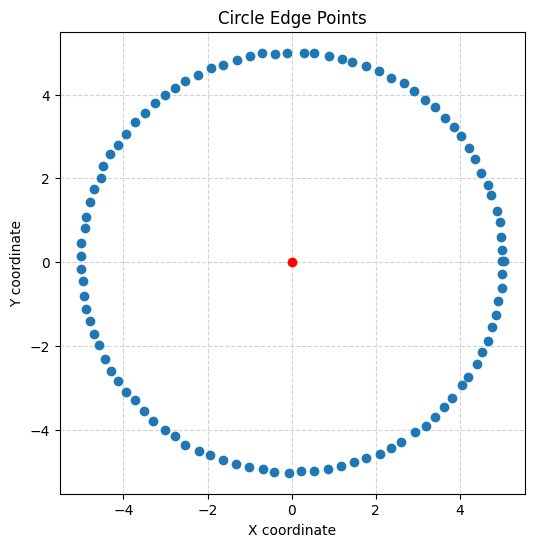

In [165]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o')  # 使用散点图表示圆上的点
plt.plot(center_x, center_x, 'o', c='r')  # 使用散点图表示圆心
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()